In [1]:
from lagrange import lagrange
import numpy as np
import base64
from PIL import Image
import io
from random import seed
from matplotlib.pyplot import imshow

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Some initial Shamir's secret sharing functions

In [2]:
def calc_polynomial_coeffs(secret):
    #polynomial_coeffs = np.random.randint(P, size=(M, k))
    polynomial_coeffs[:, 0] = secret

def get_key(x):
    y = np.zeros(len(int_list), dtype=int)
    for j in range(len(int_list)):
        for i in range(k):
            y[j] = y[j] + polynomial_coeffs[j][i] * pow(x, i, P)
        y[j] = y[j] % P
    #print(len(y))
    #print(y, '\n')
    key = np.zeros(128 * 128)
    key[0:M] = 255 * y / P
    #print(key)
    key = key.reshape((128, 128))

    #key = key.reshape(128*128)
    #print(key[100])
    #print(y[100])

    return key

def keys_to_secret(xs, keys):
    y = np.zeros(M,dtype=int)
    for m in range(M):
        points = []
        for i in range(len(keys)):
            x = xs[i]
            key = keys[i]*P/255
            key = key.reshape(128*128)
            key = key[0:M]
            points.append((x,key[m]))
        y[m] = lagrange(points, P)

    secret_str = ''
    #print(len(y))
    #print(y)
    for yi in range(len(y)):
        secret_str = secret_str + '{:04x}'.format(y[yi])

    #print(len(secret_str))
    #print(secret_str)
    data = bytes.fromhex(secret_str)
    #print(len(secret_str))
    #print(len(data))
    return data


def send_key(ids):
    key = get_key(ids)
    #print(key)

    img = Image.fromarray(key)
    img = img.convert("L")

    buf = io.BytesIO()
    img.save(buf, format='JPEG')
    byte_im = buf.getvalue()

    #print(ids, 'This your part of the secret! Your ID is ' + str(ids) + '!')
    #print(byte_im)
    #f = io.BytesIO(base64.b64decode(byte_im))
    img = Image.open(io.BytesIO(base64.b64decode(base64.b64encode(byte_im))))
    return img

# Let's generate keys to share and look at one of them

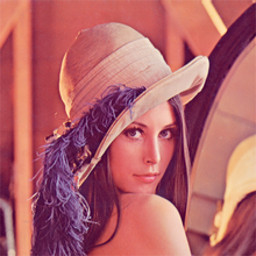

In [3]:
original_image = Image.open("pic.jpg")
original_image

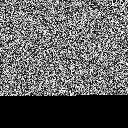

In [4]:
with open("pic.jpg", "rb") as img_file:
    my_string = base64.b16encode(img_file.read())

str_list = [my_string[i:i + 4] for i in range(0, len(my_string), 4)]
int_list = [int(x, 16) for x in str_list]
M = len(int_list)

n = 5
k = 2
P = 65581

polynomial_coeffs = np.random.randint(P, size=(M, k))
xs_received = []
keys_received = []
keys_count = 0
users_list = [1, 2]

send_key(users_list[0])

# Now let's try to combine some keys in order to restore an image

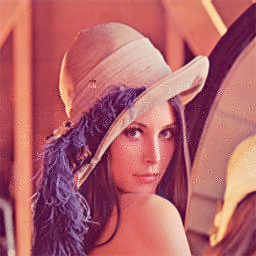

In [5]:
secret = int_list
calc_polynomial_coeffs(secret)


secret_img = keys_to_secret(users_list, [get_key(1), get_key(2)])

f = io.BytesIO(base64.b16decode(base64.b16encode(secret_img)))
decoded_image = Image.open(f)
decoded_image

## Due to some calculation inaccuracy we can obtain an image with artifacts. So implemented method is quite unstable, but it still can be improved. Also by re-generating keys (repeating two cells with code above several times) several times we can obtain almost ideal decoded image.

# Let's do the same for some more images

In [6]:
n = 5
k = 2
P = 65581

xs_received = []
keys_received = []
keys_count = 0
users_list = [1, 2]

def code_decode():
    secret = int_list
    calc_polynomial_coeffs(secret)


    secret_img = keys_to_secret(users_list, [get_key(1), get_key(2)])#keys_received)

    f = io.BytesIO(base64.b16decode(base64.b16encode(secret_img)))
    decoded_image = Image.open(f)
    imshow(np.asarray(decoded_image))

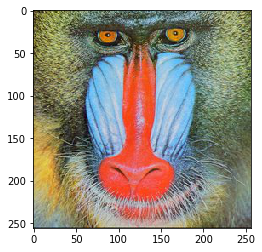

In [7]:
original_image = Image.open("pic2.jpg")
imshow(np.asarray(original_image))

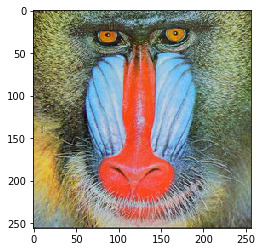

In [8]:
with open("pic2.jpg", "rb") as img_file:
    my_string = base64.b16encode(img_file.read())

str_list = [my_string[i:i + 4] for i in range(0, len(my_string), 4)]
int_list = [int(x, 16) for x in str_list]
M = len(int_list)

polynomial_coeffs = np.random.randint(P, size=(M, k))


code_decode()

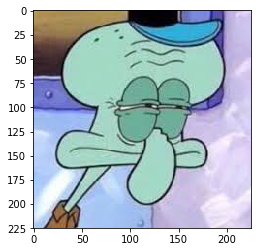

In [9]:
original_image = Image.open("pic3.jpeg")
imshow(np.asarray(original_image))

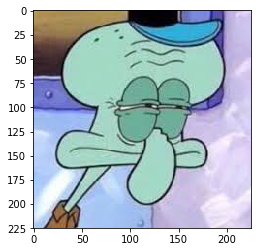

In [10]:
with open("pic3.jpeg", "rb") as img_file:
    my_string = base64.b16encode(img_file.read())

str_list = [my_string[i:i + 4] for i in range(0, len(my_string), 4)]
int_list = [int(x, 16) for x in str_list]
M = len(int_list)

polynomial_coeffs = np.random.randint(P, size=(M, k))


code_decode()